### 1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268




In [111]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,precision_score

In [157]:
df=pd.read_csv('pima_diabates.txt')

In [158]:
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [159]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [160]:
df[df['Number of times pregnant']>11].count()

Number of times pregnant                          23
Plasma glucose concentration                      23
Diastolic blood pressure (mm Hg)                  23
Triceps skin fold thickness (mm)                  23
2-Hour serum insulin (mu U/ml)                    23
Body mass index (weight in kg/(height in m)^2)    23
Diabetes pedigree function                        23
Age                                               23
target                                            23
dtype: int64

In [161]:
df=df[df['Number of times pregnant']<=11]

In [162]:
df.reset_index(inplace=True,drop=True)

In [163]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,target
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,3.563758,120.800000,68.947651,20.438926,79.981208,31.920805,0.472718,32.863087,0.342282
std,3.002960,32.093764,19.329728,15.915919,115.705130,7.922929,0.332950,11.687579,0.474792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.400000,0.627000,40.000000,1.000000
max,11.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [164]:
df.isnull().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skin fold thickness (mm)                  0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
target                                            0
dtype: int64

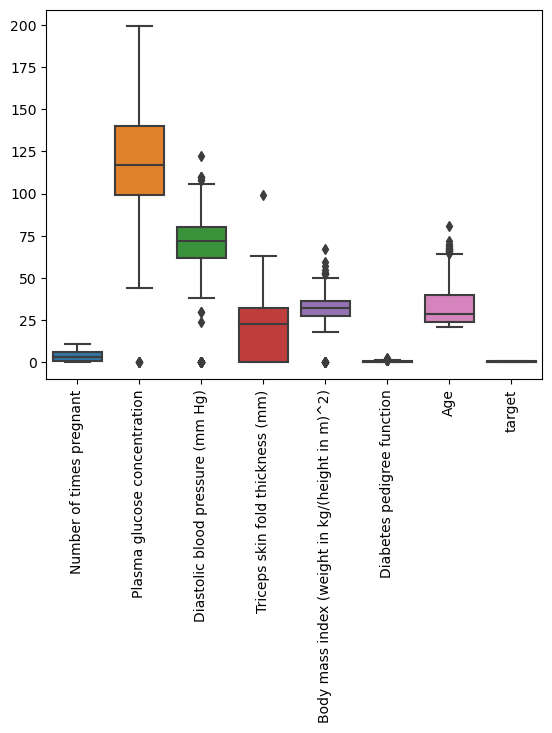

In [165]:
sns.boxplot(data=df.drop(['2-Hour serum insulin (mu U/ml)'],axis=1))
plt.xticks(rotation=90)
plt.show()

In [166]:
df[df['Triceps skin fold thickness (mm)']>80]

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,target
561,2,197,70,99,0,34.7,0.575,62,1


In [167]:
df=df.loc[df['Triceps skin fold thickness (mm)']<80]

In [168]:
df.reset_index(drop=True,inplace=True)

In [169]:
df.target.value_counts()

0    490
1    254
Name: target, dtype: int64

In [170]:
df.corr()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,target
Number of times pregnant,1.000000,0.137980,0.139181,-0.114095,-0.080024,-0.010668,-0.031328,0.537349,0.210789
Plasma glucose concentration,0.137980,1.000000,0.151474,0.035299,0.339677,0.217665,0.134599,0.264573,0.469251
Diastolic blood pressure (mm Hg),0.139181,0.151474,1.000000,0.220181,0.090463,0.287597,0.043815,0.239207,0.068138
Triceps skin fold thickness (mm),-0.114095,0.035299,0.220181,1.000000,0.452576,0.399445,0.184731,-0.145370,0.065977
2-Hour serum insulin (mu U/ml),-0.080024,0.339677,0.090463,0.452576,1.000000,0.199699,0.177965,-0.041859,0.128815
Body mass index (weight in kg/(height in m)^2),-0.010668,0.217665,0.287597,0.399445,0.199699,1.000000,0.138750,0.030778,0.288550
Diabetes pedigree function,-0.031328,0.134599,0.043815,0.184731,0.177965,0.138750,1.000000,0.039638,0.172251
Age,0.537349,0.264573,0.239207,-0.145370,-0.041859,0.030778,0.039638,1.000000,0.234713
target,0.210789,0.469251,0.068138,0.065977,0.128815,0.288550,0.172251,0.234713,1.000000


In [171]:
X=df.drop('target',axis=1)
y=df.target

In [172]:
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
739,10,101,76,48,180,32.9,0.171,63
740,2,122,70,27,0,36.8,0.340,27
741,5,121,72,23,112,26.2,0.245,30
742,1,126,60,0,0,30.1,0.349,47


In [173]:
# X_pca=PCA(n_components=1)
# X=X_pca.fit_transform(X)

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
model=LogisticRegression()
model.fit(X_train,y_train)

/home/shahid/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8456375838926175


In [199]:
confusion_matrix(y_test,y_pred)

array([[96,  3],
       [20, 30]])

In [200]:
f1_score(y_test,y_pred)

0.7228915662650602

Text(50.722222222222214, 0.5, 'predicted')

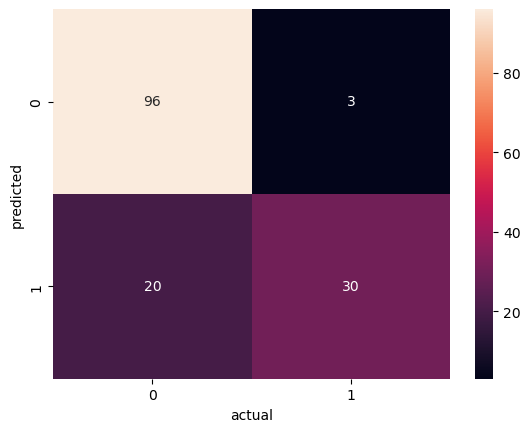

In [206]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')

In [202]:
recall_score(y_test,y_pred)

0.6

In [203]:
precision_score(y_test,y_pred)

0.9090909090909091

In [204]:
# Print the coefficients (parameter values) and intercept term
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.12630426  0.03318014 -0.01130174  0.00589281 -0.00131822  0.08736047
   0.41004698  0.01855532]]
Intercept: [-8.23204331]


In [207]:
X_pca=PCA(n_components=1)
X_pca=X_pca.fit_transform(X)

In [209]:
len(df)

744

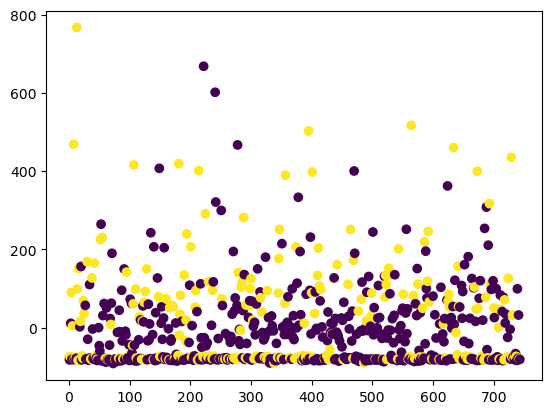

In [213]:
plt.scatter(df.index,X_pca,c=df.target)
plt.plot()

In [211]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    